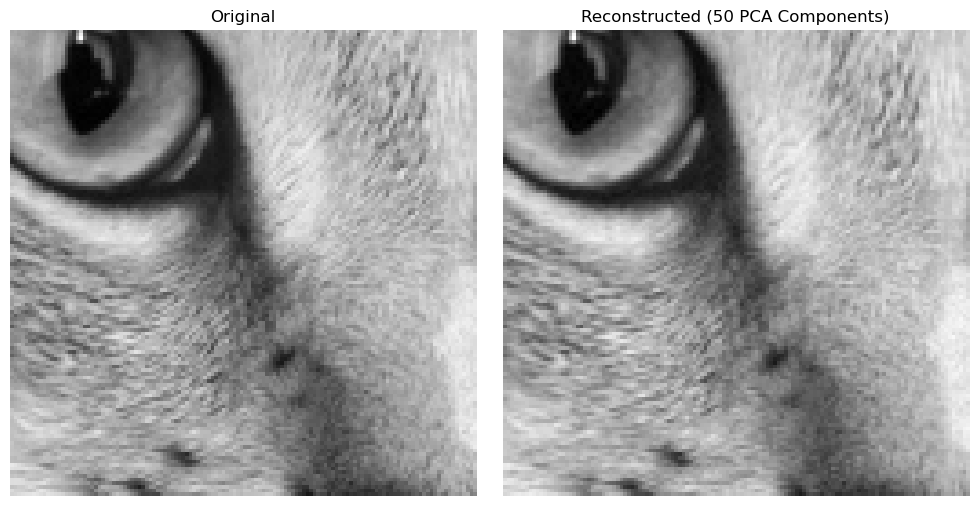

Original shape: (128, 128)
Transformed shape: (128, 50)
Reconstructed shape: (128, 128)
PCA components used: 50


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from sklearn.decomposition import PCA

# Load and prepare the image
face_rgb = data.chelsea()  # built-in image (cat face)
face_gray = color.rgb2gray(face_rgb)  # convert to grayscale
face = face_gray[100:228, 150:278]    # crop to 128x128

# Apply PCA: treat each row as a sample, each column as a feature
pca = PCA(n_components=50)  # adjust this number to change quality
X_transformed = pca.fit_transform(face)
face_reconstructed = pca.inverse_transform(X_transformed)

# Plot original vs reconstructed image
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(face, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(face_reconstructed, cmap='gray')
axes[1].set_title("Reconstructed (50 PCA Components)")
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Check info
print("Original shape:", face.shape)
print("Transformed shape:", X_transformed.shape)
print("Reconstructed shape:", face_reconstructed.shape)
print("PCA components used:", pca.n_components_)


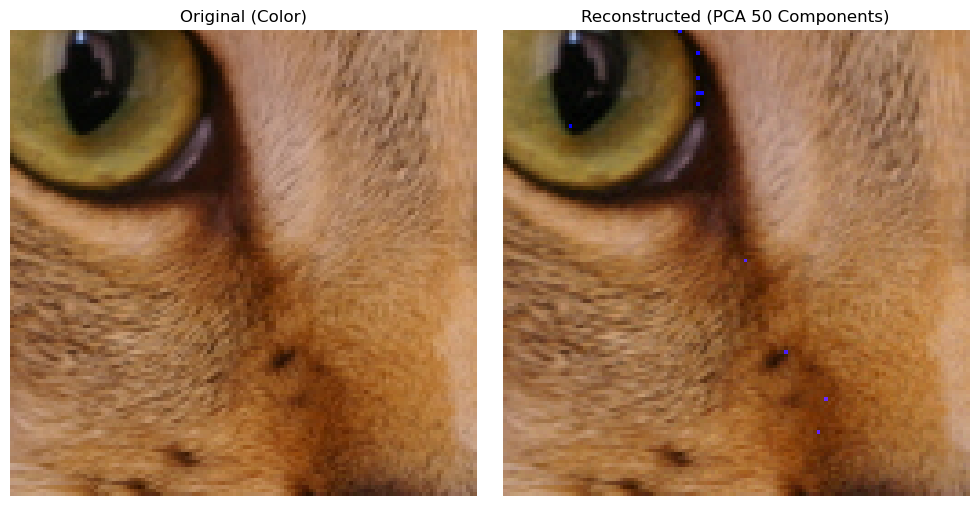

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from sklearn.decomposition import PCA

# Load original RGB image (chelsea - cat face)
face_rgb = data.chelsea()  # shape: (300, 451, 3)

# Crop to square region for better visualization
face_rgb = face_rgb[100:228, 150:278, :]  # shape: (128, 128, 3)

# Apply PCA on each channel separately
channels = []
n_components = 50  # You can try 20, 100, etc.

for i in range(3):  # Loop through R, G, B channels
    channel = face_rgb[:, :, i]
    pca = PCA(n_components=n_components)
    transformed = pca.fit_transform(channel)
    reconstructed = pca.inverse_transform(transformed)
    channels.append(reconstructed)

# Stack channels back to RGB
face_reconstructed = np.stack(channels, axis=2).astype(np.uint8)

# Plot original and reconstructed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(face_rgb)
axes[0].set_title("Original (Color)")
axes[0].axis('off')

axes[1].imshow(face_reconstructed)
axes[1].set_title(f"Reconstructed (PCA {n_components} Components)")
axes[1].axis('off')

plt.tight_layout()
plt.show()
